In [2]:
# 0-Importar librerias
from minisom import MiniSom as msom

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from sklearn.preprocessing import MinMaxScaler
import math
%matplotlib notebook



In [3]:
files = glob.glob('../data/RunStatusCSV/*.csv')
data = pd.read_csv(files[1])    
#data.drop('Time', axis=1, inplace=True)
ona = data[data.Status==0][:300]
txarra1 = data[data.Status.isin([1])][:100]
txarra2 = data[data.Status.isin([2])][:100]
txarra3 = data[data.Status.isin([3])][:100]
data = pd.concat([ona, txarra1, txarra2, txarra3], sort=False)

X = data.loc[:, data.columns != 'Status']
y = data.Status.values
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)


/home/joanes/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [4]:
#3- Inicialización y aprendizaje del SOM Initialization and training
# seleccionar dimensión del SOM 
xdim = int(math.sqrt(len(X))*5)
xdim = 40
ydim = xdim

#inicializar SOM
som = msom(xdim, ydim, X.shape[1],random_seed=145, )
som.pca_weights_init(X)
# empezar aprendizaje
print("Training...")
som.train_batch(X, 14000)  # random training
print("\n...ready!")


/home/joanes/miniconda3/lib/python3.6/site-packages/minisom.py:280: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


Training...

...ready!


[0, 40, 0, 40]

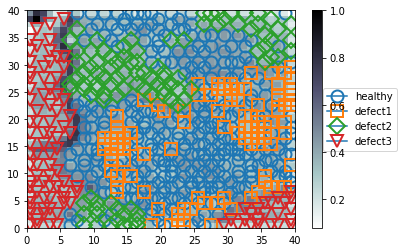

In [15]:
# enseñar SOM
fig=plt.figure()
ax = fig.add_subplot(1,1,1)

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()


#plotear las clases (ya que las tenemos....)
labels=['healthy','defect1','defect2','defect3']
markers = ['o', 's', 'D','v']
colors = ['C0', 'C1', 'C2','C3']
from matplotlib.lines import Line2D
custom_lines=[]
for cnt,x in enumerate(labels):
    custom_lines.append(Line2D([0],[0], marker=markers[cnt], markerfacecolor='None',
             markeredgecolor=colors[cnt], markersize=12, markeredgewidth=2))

for cnt, xx in enumerate(X):

    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    ax.plot(w[0]+.5, w[1]+.5, markers[y[cnt]], markerfacecolor='None',
             markeredgecolor=colors[y[cnt]], markersize=12, markeredgewidth=2)
ax.legend(custom_lines, labels,loc='center right',bbox_to_anchor=(1.4, 0.5))
plt.axis([0, xdim, 0, ydim])

#plt.show()

[0, 40, 0, 40]

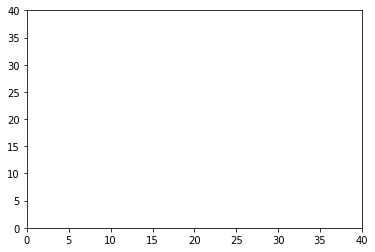